In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Milan  = pd.read_csv('../ValoresAtipicosMilan.csv')

In [3]:
# Verificamos información del dataframe
Milan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23705 non-null  int64  
 1   last_scraped                                  23705 non-null  object 
 2   name                                          23705 non-null  object 
 3   host_id                                       23705 non-null  int64  
 4   host_name                                     23705 non-null  object 
 5   host_since                                    23705 non-null  object 
 6   host_response_time                            23705 non-null  object 
 7   host_is_superhost                             23705 non-null  object 
 8   host_identity_verified                        23705 non-null  object 
 9   neighbourhood                                 23705 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Milan['minimum_nights_avg_ntm'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23705 entries, 0 to 23704
Series name: minimum_nights_avg_ntm
Non-Null Count  Dtype  
--------------  -----  
23705 non-null  float64
dtypes: float64(1)
memory usage: 185.3 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Milan['minimum_nights_avg_ntm'].max()
Min = Milan['minimum_nights_avg_ntm'].min()
Limites = [Min, Max]
Limites

[1.0, 56.8]

In [6]:
# Calculamos el rango R
R = Max - Min
R

55.8

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 23706

ni = 1 + 3.32 * np.log10(n)
ni

15.524529489816098

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

3.5943118299723102

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (1, 56.8, 16)
intervalos

array([ 1.  ,  4.72,  8.44, 12.16, 15.88, 19.6 , 23.32, 27.04, 30.76,
       34.48, 38.2 , 41.92, 45.64, 49.36, 53.08, 56.8 ])

In [10]:
# Creamos las categorías

categorias = [
    "Una noche",
    "Estancia muy corta",
    "Estancia corta",
    "Estancia breve",
    "Estancia moderada",
    "Estancia estándar",
    "Estancia cómoda",
    "Estancia prolongada",
    "Estancia más larga",
    "Estancia amplia",
    "Estancia extendida",
    "Estancia larga",
    "Estancia muy larga",
    "Estancia extensiva",
    "Estancia máxima"
]


In [11]:
# Creamos las ctegorias en la columna numerica
Milan['minimum_nights_avg_ntm'] = pd.cut ( x = Milan ['minimum_nights_avg_ntm'], bins = intervalos, labels = categorias )
Milan['minimum_nights_avg_ntm']

0        Una noche
1              NaN
2        Una noche
3        Una noche
4        Una noche
           ...    
23700    Una noche
23701          NaN
23702          NaN
23703          NaN
23704          NaN
Name: minimum_nights_avg_ntm, Length: 23705, dtype: category
Categories (15, object): ['Una noche' < 'Estancia muy corta' < 'Estancia corta' < 'Estancia breve' ... 'Estancia larga' < 'Estancia muy larga' < 'Estancia extensiva' < 'Estancia máxima']

In [12]:
table1 = freq_tbl(Milan['minimum_nights_avg_ntm'])
table1

,minimum_nights_avg_ntm,frequency,percentage,cumulative_perc
0,Una noche,14234,0.600464,0.875454
1,Estancia muy corta,909,0.038346,0.931361
2,Estancia prolongada,583,0.024594,0.967218
3,Estancia más larga,138,0.005822,0.975706
4,Estancia breve,115,0.004851,0.982779
5,Estancia corta,94,0.003965,0.988560
6,Estancia cómoda,89,0.003754,0.994034
7,Estancia estándar,51,0.002151,0.997171
8,Estancia moderada,16,0.000675,0.998155
9,Estancia extendida,10,0.000422,0.998770


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,minimum_nights_avg_ntm,frequency
0,Una noche,14234
1,Estancia muy corta,909
2,Estancia prolongada,583
3,Estancia más larga,138
4,Estancia breve,115
5,Estancia corta,94
6,Estancia cómoda,89
7,Estancia estándar,51
8,Estancia moderada,16
9,Estancia extendida,10


In [15]:
# Obtener un filtro de los valores más relevantes de las vaiables categóricas seleccionadas

Filtro = table2[ table2['frequency'] > 50]
Filtro

,minimum_nights_avg_ntm,frequency
0,Una noche,14234
1,Estancia muy corta,909
2,Estancia prolongada,583
3,Estancia más larga,138
4,Estancia breve,115
5,Estancia corta,94
6,Estancia cómoda,89
7,Estancia estándar,51


In [16]:
# Ajusto el indice de mi data frame

Filtro_index = Filtro.set_index('minimum_nights_avg_ntm')
Filtro_index

,frequency
minimum_nights_avg_ntm,
Una noche,14234
Estancia muy corta,909
Estancia prolongada,583
Estancia más larga,138
Estancia breve,115
Estancia corta,94
Estancia cómoda,89
Estancia estándar,51


Text(0, 0.5, 'Frecuencia')

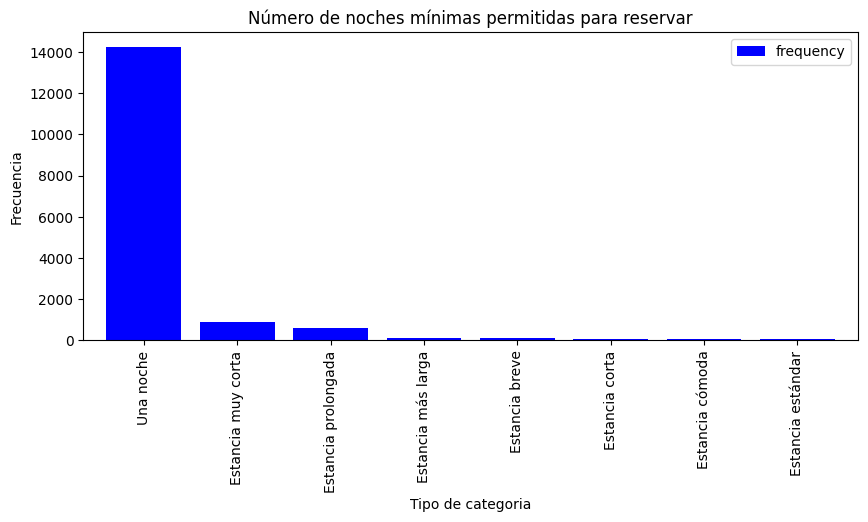

In [17]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Número de noches mínimas permitidas para reservar')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')